<a href="https://colab.research.google.com/github/violet417/violet417/blob/main/2MD%EA%B8%B0%EC%B4%88_05_K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K 최근접 이웃 분류 모델
- 가장 가까운 데이터를 탐색해서 값을 예측하는 모델
- 새로운 입력으로 들어온 데이터를 특정값으로 분류하는데 현재 데이터와 가장 가까운 k개의 데이터를 찾아 가장 많은 분류 값으로 현재의 데이터를 분류하는 알고리즘  

∇ 장점
- 간단한 원리
- 우수한 성능
- 이진분류, 다중분류 모두 가능  
  
∇ 단점
- 속도가 아주 느리다.
- 데이터베이스에 모든 데이터가 저장되어야 함. 
- 하나의 예측을 분류하기 위해서 저장된 모든 데이터와 비교 해야함.
- 적절한 K값을 찾아야 함. (최적의 이웃수를 찾는 과정을 거쳐야 함)


In [ ]:
# K 최근접 이웃 모델
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()    # ① 모델생성 -> knn 변수에 넣어 줌
knn.fit(문제집, 정답지)         # ② fit 학습 
knn.score(문제집, 정답지)       # ③ score 평가
knn.predict(data)               # ④ 활용 -> 값 예측

In [ ]:
import pandas as pd

fish = pd.read_csv('fish.csv')
fish

,length,weight,class
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1


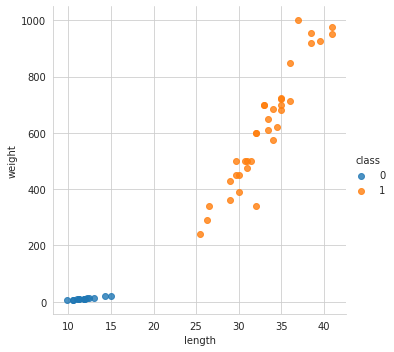

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')    # 배경 넣기
# 산점도 그리기 (x=길이, y=무게, data=fish, hue = 클래스별로, fit_reg: 회귀선 유무)
sns.lmplot(x='length', y = 'weight', data = fish, hue = 'class', fit_reg = False)

In [ ]:
length = fish['length'].to_numpy()    # 시리즈를 바로 행렬로 변환
weight = fish['weight'].to_numpy()
print(length)
print(weight)

[25.4 26.3 26.5 29.  29.  29.7 29.7 30.  30.  30.7 31.  31.  31.5 32.
 32.  32.  33.  33.  33.5 33.5 34.  34.  34.5 35.  35.  35.  35.  36.
 36.  37.  38.5 38.5 39.5 41.  41.   9.8 10.5 10.6 11.  11.2 11.3 11.8
 11.8 12.  12.2 12.4 13.  14.3 15. ]
[ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.     6.7    7.5    7.     9.7    9.8
    8.7   10.     9.9    9.8   12.2   13.4   12.2   19.7   19.9]


In [ ]:
import numpy as np

data = []

for i in range(49):
    data.append([length[i], weight[i]])

data = np.array(data)    # 행렬로 변환
data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
target = fish['class'].to_numpy()
target    

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()    # 모델 생성
knn.fit(data, target)

KNeighborsClassifier()

In [ ]:
knn.predict([[35, 400]])    # 값 예측 | 기본적으로 주변의 5개의 데이터를 가져와서 예측

array([1])

In [ ]:
knn.score(data, target) # 예측값과 실제값의 맞은 비율. 0 ~ 1 사이로 표시됨. 

1.0

In [ ]:
target  # 실제값

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
knn.predict(data)   # 예측값

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
for i in range(1, 50, 2):   # 다수결이므로 홀수 갯수로 측정
    knn = KNeighborsClassifier(n_neighbors=i)    # 기본 5개 -> 이웃수 변경
    knn.fit(data, target)
    score = knn.score(data, target)    # 평가 (이 모델이 얼마나 잘 맞추는지 확률로 표현)
    print("이웃수: {} // 점수: {}".format(i, score))

이웃수: 1 // 점수: 1.0
이웃수: 3 // 점수: 1.0
이웃수: 5 // 점수: 1.0
이웃수: 7 // 점수: 1.0
이웃수: 9 // 점수: 1.0
이웃수: 11 // 점수: 1.0
이웃수: 13 // 점수: 1.0
이웃수: 15 // 점수: 1.0
이웃수: 17 // 점수: 1.0
이웃수: 19 // 점수: 0.9795918367346939
이웃수: 21 // 점수: 0.9795918367346939
이웃수: 23 // 점수: 0.9795918367346939
이웃수: 25 // 점수: 0.9795918367346939
이웃수: 27 // 점수: 0.9795918367346939
이웃수: 29 // 점수: 0.7142857142857143
이웃수: 31 // 점수: 0.7142857142857143
이웃수: 33 // 점수: 0.7142857142857143
이웃수: 35 // 점수: 0.7142857142857143
이웃수: 37 // 점수: 0.7142857142857143
이웃수: 39 // 점수: 0.7142857142857143
이웃수: 41 // 점수: 0.7142857142857143
이웃수: 43 // 점수: 0.7142857142857143
이웃수: 45 // 점수: 0.7142857142857143
이웃수: 47 // 점수: 0.7142857142857143
이웃수: 49 // 점수: 0.7142857142857143


In [ ]:
# 이웃수 29: 빙어데이터 14개 + 도미데이터 15개 
# 다수결에서 도미데이터가 더 많음, 29개부터는 컴퓨터가 빙어데이터를 다 틀리다고 봄

In [ ]:
35/49

0.7142857142857143